In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
# import tweepy
import tweepy as tw

# your Twitter API key and API secret
consumer_key = "grWxwLy6g082ECk3axUb7iXCG"
consumer_secret = "Ocg1emgQ7r4weEX5gbmzZkl4wL7AzcjKuYMBArIVsQVqMvtDHn"

#access_token
access_token = "4025987723-Lnt5wiGNUCmKhWodBQNZ2H2NYYdveJZQVmaaSiQ"
#access_token_secret
access_token_secret = "hk5uIQOByxS6D2mRMRX0Pio3uyZ6caKlTeQLDeapMo18Y"

bearer_token = "AAAAAAAAAAAAAAAAAAAAAE6JWQEAAAAANBrq5EwtSHGg7RMmM6tDEQFoyr0%3Dn64Y9Ft0maRk2VpEYM3cQcjMVtQHINlWC3Esv8u96oOSuMimLi"


client = tw.Client(bearer_token = bearer_token, consumer_key = consumer_key, access_token = access_token,
                  access_token_secret = access_token_secret)

In [240]:
apple_data = pd.DataFrame(client.get_recent_tweets_count('apple cyberattack').data)
apple_data['start'] = [date.tz_convert('US/Pacific').tz_localize(None) for date in pd.to_datetime(apple_data['start'])]
apple_data['end'] = [date.tz_convert('US/Pacific').tz_localize(None) for date in pd.to_datetime(apple_data['end'])]
apple_data

,end,start,tweet_count
0,2021-11-30 18:00:00,2021-11-30 17:42:26,0
1,2021-11-30 19:00:00,2021-11-30 18:00:00,1
2,2021-11-30 20:00:00,2021-11-30 19:00:00,0
3,2021-11-30 21:00:00,2021-11-30 20:00:00,2
4,2021-11-30 22:00:00,2021-11-30 21:00:00,0
...,...,...,...
164,2021-12-07 14:00:00,2021-12-07 13:00:00,78
165,2021-12-07 15:00:00,2021-12-07 14:00:00,19
166,2021-12-07 16:00:00,2021-12-07 15:00:00,8
167,2021-12-07 17:00:00,2021-12-07 16:00:00,6


In [241]:
def plot_cyberattack_tweets(company):
    '''Plots the cyberattack tweets per hour for the given company over the last 7 days
    '''
    try:
        df = pd.DataFrame(client.get_recent_tweets_count(company + ' cyberattack').data)
    except:
        return None
    df['start'] = pd.to_datetime(df['start'])
    df['end'] = pd.to_datetime(df['end'])
    max_index = int(df[['tweet_count']].idxmax())
    max_time = list(df['start'])[max_index].tz_convert('US/Pacific').tz_localize(None) # Pandas datetime object
    print('Time of maximum for', company + ':', max_time)
    df.plot('start', 'tweet_count', title=company, xlabel='Time', ylabel='Number of Tweets')

Time of maximum for facebook: 2021-12-05 11:00:00


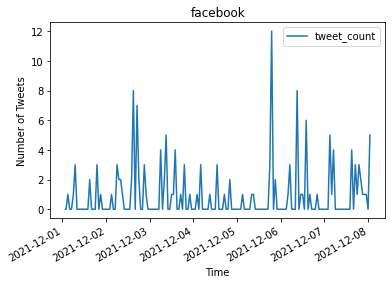

In [244]:
plot_cyberattack_tweets('facebook')

In [232]:
def recent_attacks(companies):
    '''
    Takes in a list of company names and returns a list of company names that have peaked since the end of last trading day
    '''
    lst = []
    # Can only make 300 requests per 15 minutes, gives us 25 for the rest of the notebook
    if len(companies) > 275:
        companies = companies[:275]
    for company in companies:
        if '&' not in company:
            try:
                df = pd.DataFrame(client.get_recent_tweets_count(company + ' cyberattack').data)
            except:
                print('ERROR: Too many requests')
            df['start'] = pd.to_datetime(df['start'])
            df['end'] = pd.to_datetime(df['end'])
            max_index = int(df[['tweet_count']].idxmax())
            max_time = list(df['start'])[max_index]
            max_time = max_time.tz_convert('US/Pacific').tz_localize(None) # Makes the timezone correct

            #if market is already closed
            if pd.Timestamp.now() >= pd.Timestamp.now().floor(freq='D') + pd.Timedelta('13 hours'):
                #if peak has happened since market closed
                if max_time >= pd.Timestamp.now().floor(freq='D') + pd.Timedelta('13 hours'):
                    lst.append(company)
            elif max_time >= pd.Timestamp.now().floor(freq='D') - pd.Timedelta('11 hours'):
                lst.append(company)
            
    return lst

Forbes' Top 100 Digital Companies

https://www.forbes.com/top-digital-companies/list/#tab:rank

In [233]:
tech_stocks = pd.read_csv(r'C:\Users\robby\OneDrive\Documents\cib\tech_stocks.csv').drop('Rank', axis=1).dropna()
tech_stocks

,Company,Industry,Country
0,Apple,Computer Hardware,United States
1,Microsoft,Software & Programming,United States
2,Samsung Electronics,Semiconductors,South Korea
3,Alphabet,Computer Services,United States
4,AT&T,Telecommunications services,United States
...,...,...,...
104,Fortive,Electrical Equipment,United States
105,Ericsson,Communications Equipment,Sweden
106,Fiserv,Software & Programming,United States
107,Fujitsu,Computer Hardware,Japan


In [234]:
companies = recent_attacks(list(tech_stocks['Company']))

Time of maximum for Apple: 2021-12-07 13:00:00
Time of maximum for Amazon: 2021-12-07 15:00:00
Time of maximum for Broadcom: 2021-12-07 15:00:00
Time of maximum for Netflix: 2021-12-07 15:00:00


[None, None, None, None]

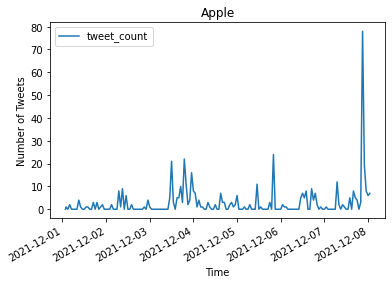

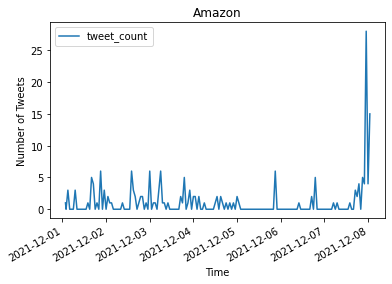

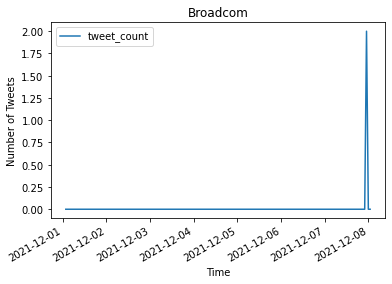

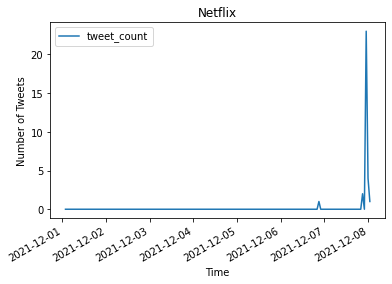

In [235]:
[plot_cyberattack_tweets(i) for i in companies]

https://www.mercurynews.com/2021/12/07/amazon-web-services-faces-huge-outage-thousands-of-users-report-problems/

Article regarding today's Amazon Web Services outage.

In [236]:
companies_in_article = ['Delta', 'Southwest', 'Instacart', 'Venmo', 'Kindle', 'Roku', 'Disney']

Time of maximum for Delta: 2021-12-05 05:00:00
Time of maximum for Southwest: 2021-12-03 13:00:00
Time of maximum for Instacart: 2021-11-30 17:40:45
Time of maximum for Venmo: 2021-12-07 17:00:00
Time of maximum for Kindle: 2021-11-30 17:40:45
Time of maximum for Roku: 2021-11-30 17:40:45
Time of maximum for Disney: 2021-12-07 17:00:00


[None, None, None, None, None, None, None]

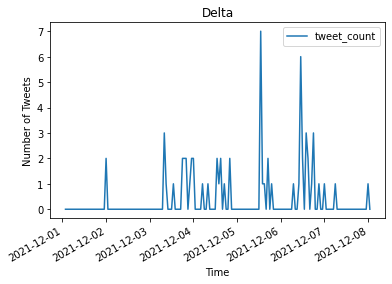

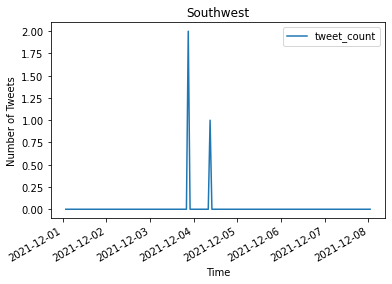

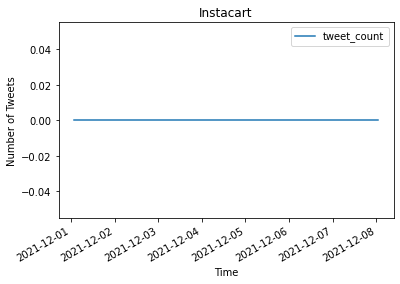

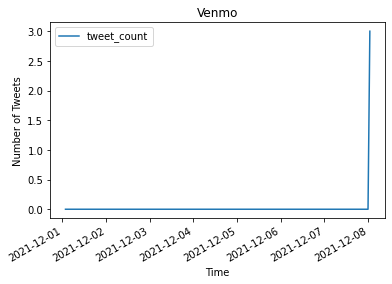

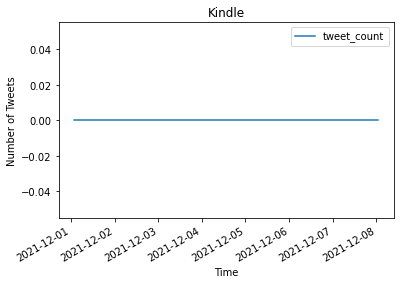

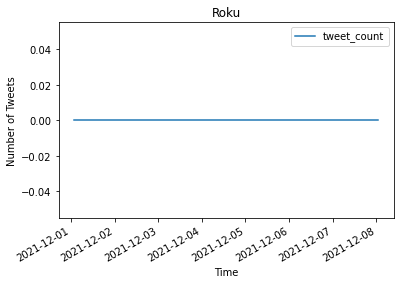

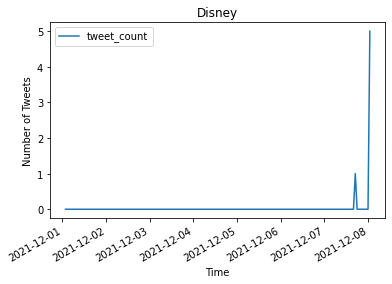

In [237]:
[plot_cyberattack_tweets(i) for i in companies_in_article]